# Using ALIAS to Find Anomalous Lines

The primary function of ALIAS is to identify unusual emmission lines in APOGEE spectra that could be promising candidate technosignatures. This section covers extracting a list of such candidates from a dataset of spectra.

## Creating a Dataset

Once the targets have been selected and the spectra have been obtained, as was shown in the previous tutorial, the spectra need to be loaded into a dataset. Thankfully, `alias` comes with a utility for this purpose.

We can use the filenames we saved previously to load all of the spectra into a `dataset` object.

In [3]:
import alias

with open('data/sample_star_files', 'r') as f:
    spectra = f.read().splitlines()

files = [ 'data/spectra/%s' %spectrum for spectrum in spectra ]

ds = alias.loadDataset(files)

/home/jhand/.conda/envs/dev/lib/python3.11/site-packages/alias/__init__.py:57: RuntimeWarning: divide by zero encountered in power
  spec_ivar_parts = np.array(hdul[2].data)**-2


This object has three important properties that can be accessed directly to work with the spectra.

- `wave`: This property is a one-dimensional array that stores the wavelengths of the pixels in the spectra.
- `flux`: This is a two-dimensional array that stores the flux values for each spectrum.
- `ivar`: This is a two-dimensional array that stores the inverse-variance of each pixel in each spectrum.

Now we can plot one of the spectra like so.

Text(0, 0.5, 'Relative Flux')

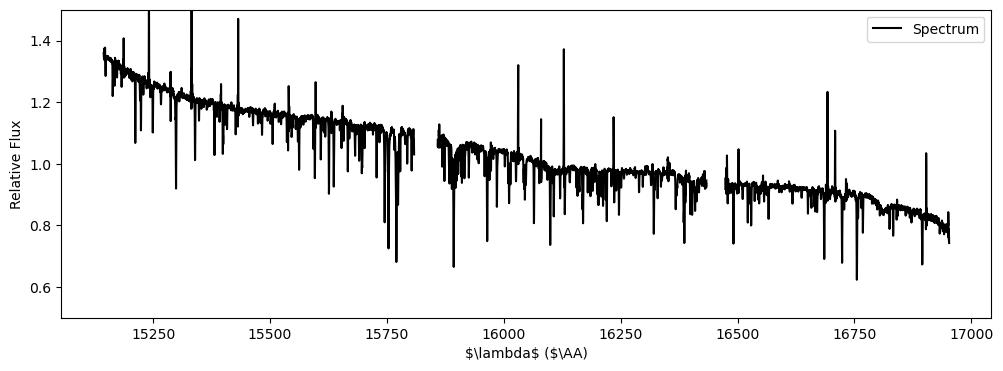

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.plot(ds.wave, ds.flux[10], color='black', label='Spectrum')
plt.ylim(0.5, 1.5)
plt.legend()
plt.xlabel('$\lambda$ ($\AA)')
plt.ylabel('Relative Flux')

## Continuum Normalizing the Spectra

`alias` assumes that the spectra it is working with are continuum normalized. The submodule `alias.continuum_normalize` is provided to easily perform this process. The details of implimentation are provided in the [continuum normalization notebook](/notebooks/continuum_normalize.html)